<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data: Wholesale customers data
# Data extraction
data1 = pd.read_csv('../data/Wholesale customers data.csv')
customer_df = data1.copy()
customer_df.head(10) # Exploring the data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
import colorama
from colorama import Fore, Style

def explore_data(data): 
    """
    Explores NaNs, empty spaces and duplicates. Returns a dataframe.
    """
    duplicate_rows = data.duplicated().sum()
    nan_values = data.isna().sum()
    empty_spaces = data.eq(' ').sum()

    if duplicate_rows > 0:
        print(Style.BRIGHT + Fore.RED + f"❗WATCH OUT: There are {duplicate_rows} duplicated rows.")
    else:
        print(Style.BRIGHT + Fore.GREEN + f"✅ There are no duplicated rows!")

    return pd.DataFrame({"nan": nan_values, "empty_spaces": empty_spaces})

In [4]:
# Your code here:
# Clean analysis
explore_data(customer_df)

✅ There are no duplicated rows!


,nan,empty_spaces
Channel,0,0
Region,0,0
Fresh,0,0
Milk,0,0
Grocery,0,0
Frozen,0,0
Detergents_Paper,0,0
Delicassen,0,0


In [5]:
def data_analysis(data): 
    """
    Explores data shape, data types and number of unique values. Returns a dataframe.
    """
    data_types = data.dtypes
    nunique_values = data.nunique()

    print(Style.BRIGHT + Fore.BLUE + f"There are {data.shape[0]} rows.")
    print(Style.BRIGHT + Fore.BLUE + f"There are {data.shape[1]} columns.")

    return pd.DataFrame({"data_types": data_types, "nunique_values": nunique_values})

In [6]:
data_analysis(customer_df)

There are 440 rows.
There are 8 columns.


,data_types,nunique_values
Channel,int64,2
Region,int64,3
Fresh,int64,433
Milk,int64,421
Grocery,int64,430
Frozen,int64,426
Detergents_Paper,int64,417
Delicassen,int64,403


In [7]:
def unique_values(data): 
    """
    Explores columns with fewer than 15 unique values and prints those values in ascending order.
    
    """
    for column in data.columns:
        if data[column].nunique() < 15: # Only shows the values for the columns that have less than 15 unique values
            print(f"The unique values for '{column}' are:")
            print(sorted(data[column].unique())) # Shows it in ascending order
   

In [8]:
unique_values(customer_df)

The unique values for 'Channel' are:
[1, 2]
The unique values for 'Region' are:
[1, 2, 3]


In [9]:
customer_df.describe().round(2)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,1.32,2.54,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,0.47,0.77,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,1.00,2.00,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,1.00,3.00,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,2.00,3.00,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,2.00,3.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


In [10]:
# Dealing with multicollinarity
customer_corr = round(customer_df.corr(), 2) 

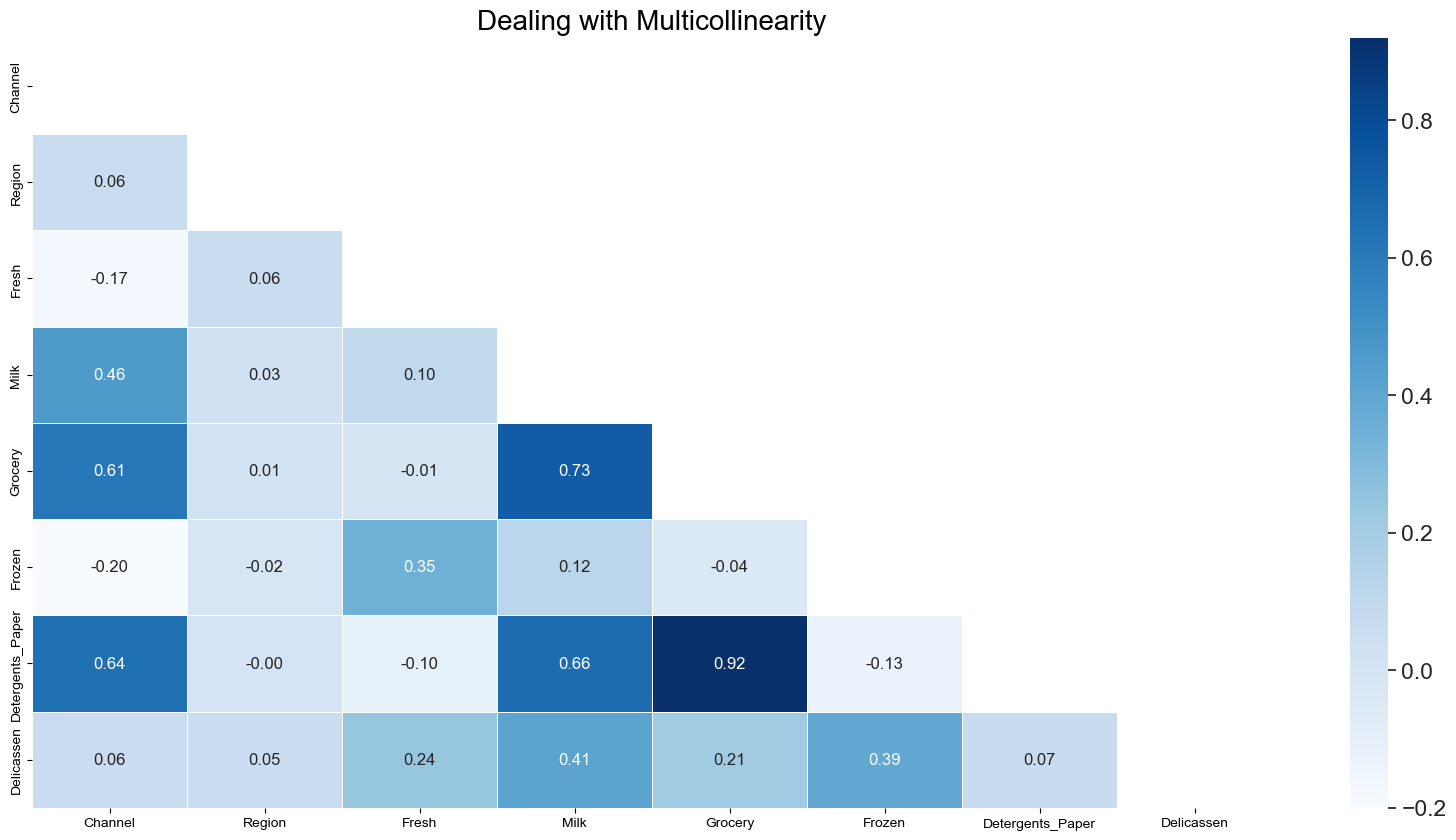

In [11]:
import matplotlib.colors as mcolors

# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(customer_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

# Create a custom colormap from a list of colors
#colors = ["#fcbf49", "#11D07D"]  # Red, Green, Blue
#cmap = mcolors.LinearSegmentedColormap.from_list("my_cmap", colors)

f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(customer_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="Blues", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [12]:
# Create a new database for continuous columns
df_to_plot = customer_df.loc[:,customer_df.nunique() > 10]

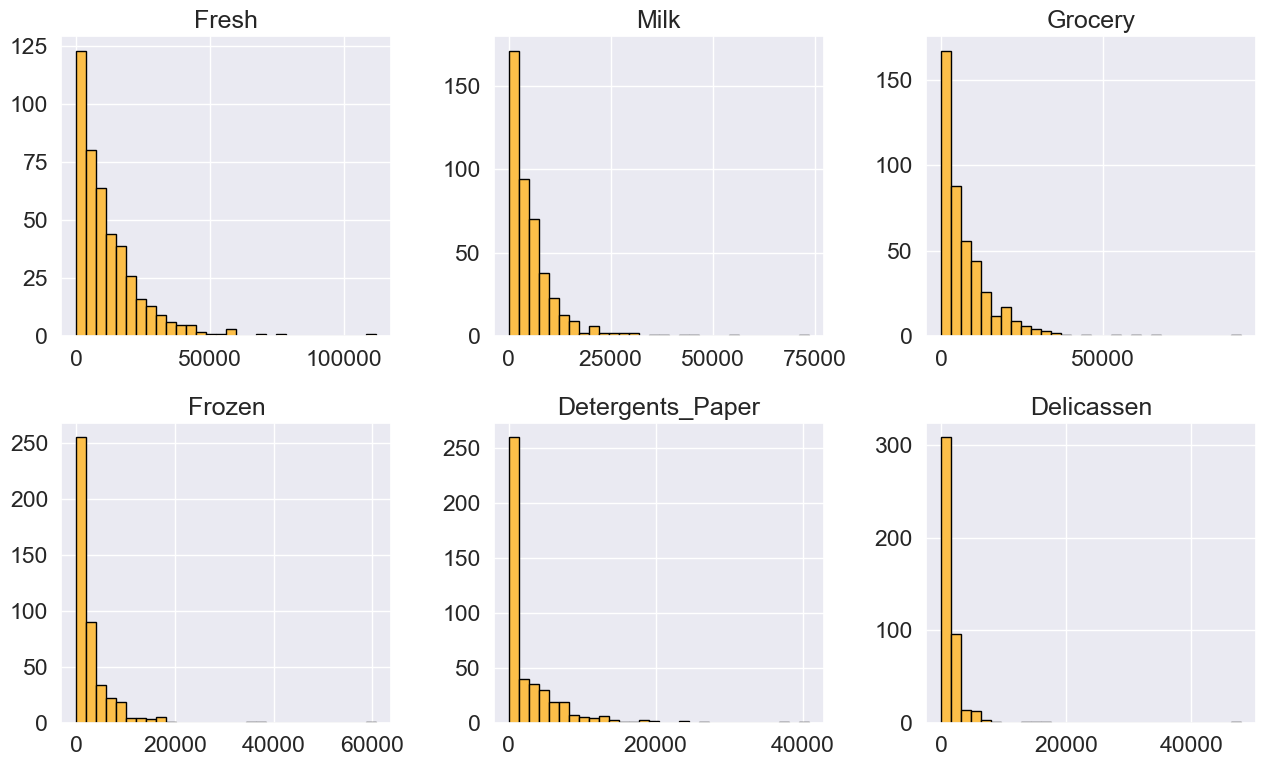

In [13]:
color = '#fcbf49'

# grid size
nrows, ncols = 2, 3  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(13, 8))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(df_to_plot.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(df_to_plot.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(df_to_plot.columns[i])

plt.tight_layout()
plt.show()

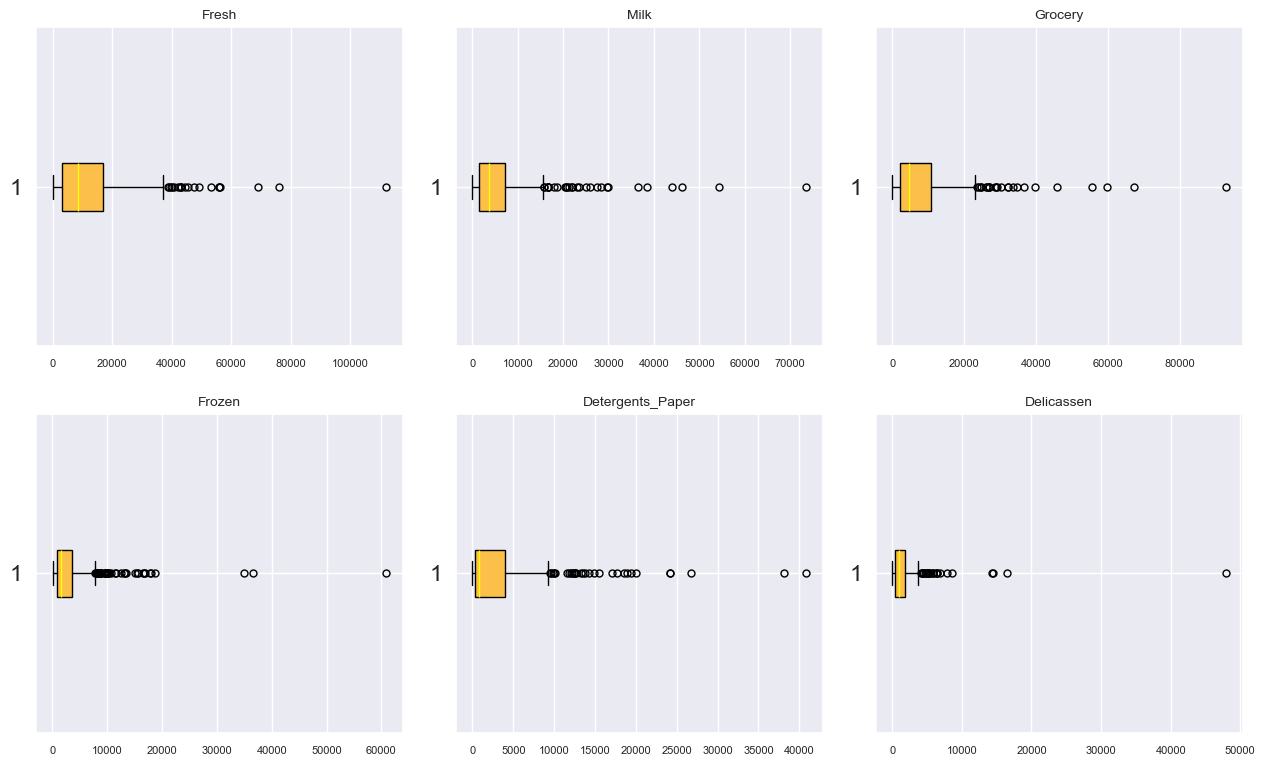

In [14]:
color = '#fcbf49'

# grid size
nrows, ncols = 2, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(13, 8))
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(df_to_plot.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(df_to_plot.iloc[:, i].dropna(), vert=False, patch_artist=True, 
        boxprops=dict(facecolor=color, color='black'), 
        medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
        capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(df_to_plot.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

**Your observations here**

- The DataSet is already clean, no NaNs, no duplicates, and no empty spaces
- All the values are numerical. However for `Channel` and `Region` there are only 2 and 3 number of unique values.
- `Channel` and `Region` can be considered as **categorical**.
- Strong correlation between `Grocery` and `Detergents_Paper`
- High range of values in `Fresh`, `Milk` and `Grocery`
- More outliers in `Fresh`, `Milk`, `Detergents_Paper` and `Grocery`
- Continuous values are positively skewed

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [16]:
# Your code here
# Change column names to sanke case
customer_df.columns = [col.lower().replace(" ", "_") for col in customer_df.columns]
customer_df

,channel,region,fresh,milk,grocery,frozen,detergents_paper,delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [31]:
customer_df = customer_df.drop(columns = ["channel","region"])

**Your comment here**

-  snake_case transformation to the dataframe
-  Drop channel and region colummns

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [32]:
# Your import here:
from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
customers_scale = scaler.fit_transform(customer_df)


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [33]:
from sklearn.cluster import KMeans

# Your code here:
num_clusters = 2 # Set 2 cluster
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit scaled data
kmeans.fit(customers_scale)
customer_df['labels'] = kmeans.labels_

In [34]:
customer_df

,fresh,milk,grocery,frozen,detergents_paper,delicassen,labels
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,1


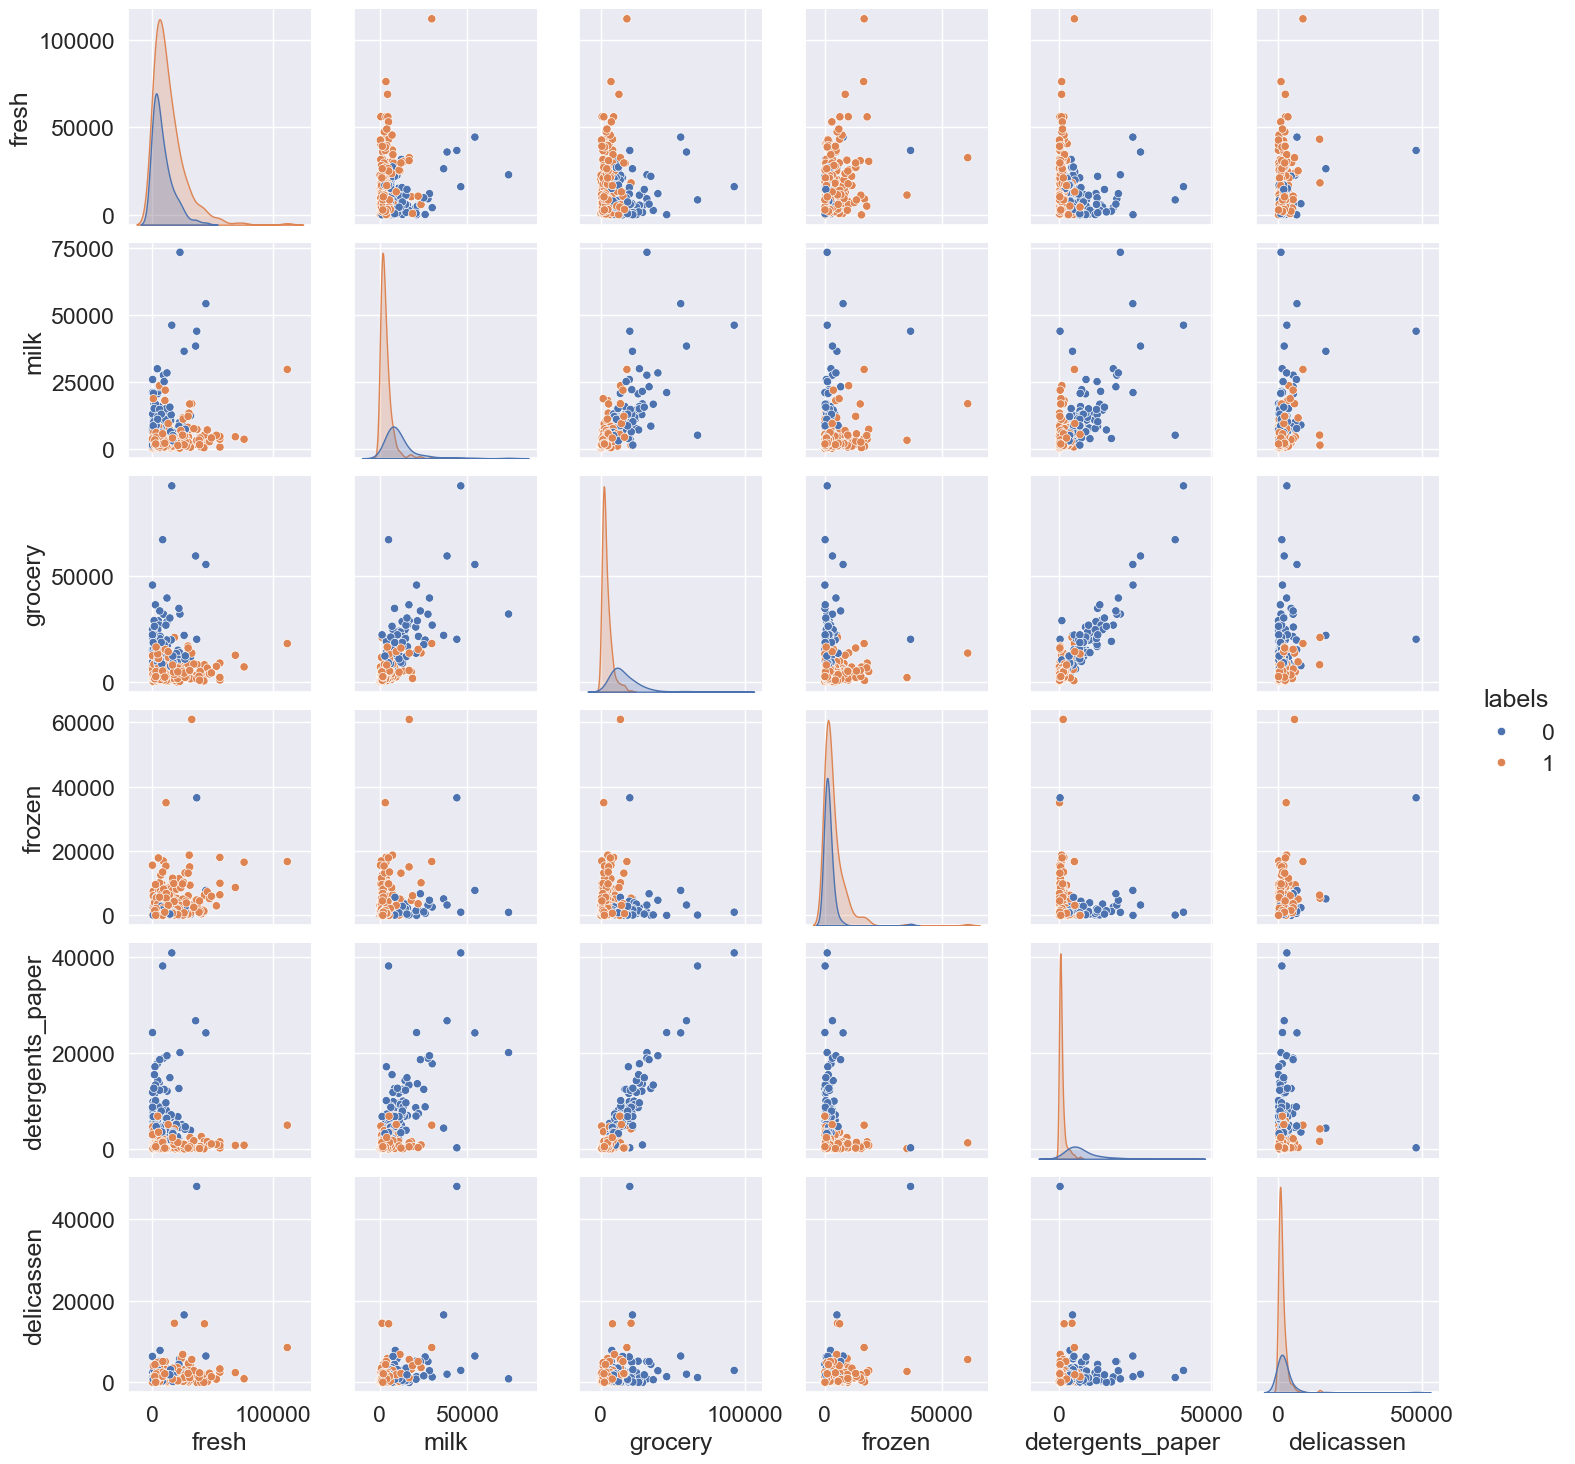

In [35]:
sns.pairplot(customer_df, hue="labels")
plt.show()

### Looking to the elbow we can choose 2 like the correct number of clusters

In [39]:
kmeans_2 = KMeans(n_clusters=2).fit(customers_scale)

labels = kmeans_2.predict(customers_scale)

clusters = kmeans_2.labels_.tolist()

In [40]:
customer_df['labels'] = clusters

Count the values in `labels`.

In [41]:
# Your code here:
customer_df.labels.value_counts()

labels
0    306
1    134
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [51]:
from sklearn.cluster import DBSCAN 

# Your code here
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(customers_scale)
customer_df['labels_DBSCAN'] = dbscan.labels_

Count the values in `labels_DBSCAN`.

In [56]:
# Your code here
customer_df['labels_DBSCAN'].value_counts()

labels_DBSCAN
 1    206
-1    190
 0     31
 3      8
 2      5
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [60]:
def plot(x,y,hue):
    sns.scatterplot(x=x, y=y, hue=hue, palette='viridis', s=100)
    plt.title('Detergents Paper vs Milk ')
    return plt.show()

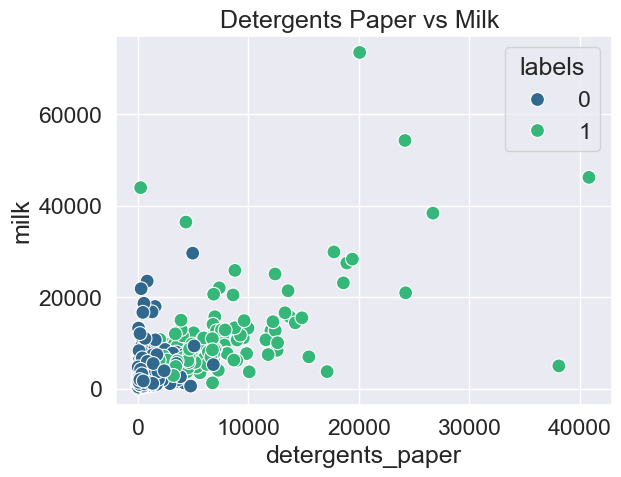

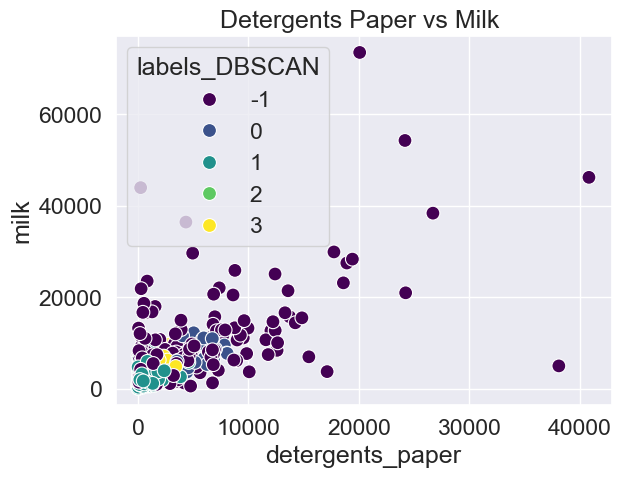

In [61]:
# Your code here:
plot(customer_df["detergents_paper"], customer_df["milk"], customer_df['labels'])
plot(customer_df["detergents_paper"], customer_df["milk"], customer_df['labels_DBSCAN'])

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [62]:
# Your code here:
def plot(x,y,hue):
    sns.scatterplot(x=x, y=y, hue=hue, palette='viridis', s=100)
    plt.title('Grocery vs Fresh')
    return plt.show()

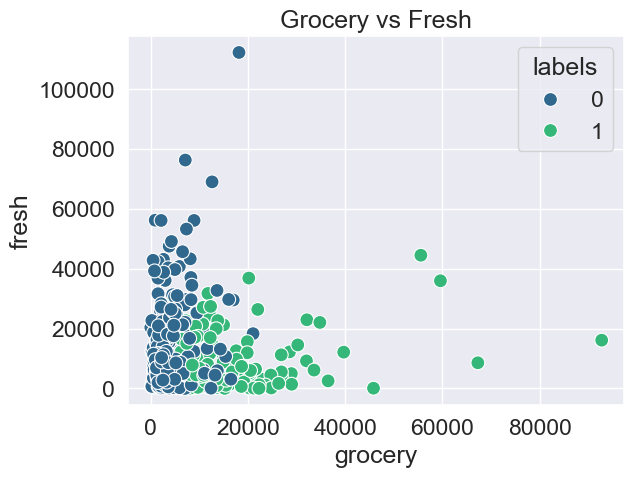

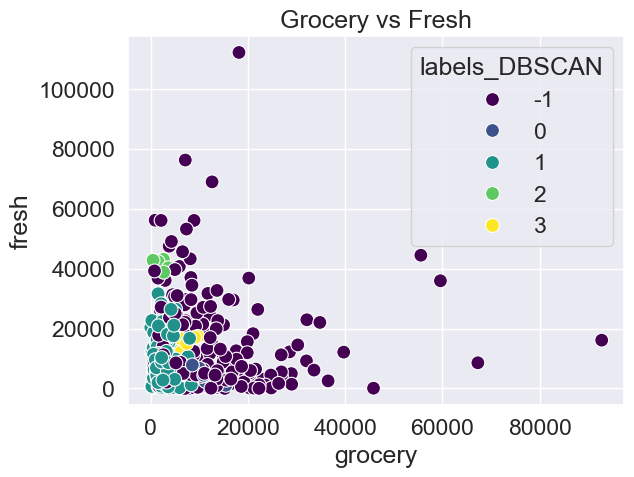

In [63]:
plot(customer_df["grocery"], customer_df["fresh"], customer_df['labels'])
plot(customer_df["grocery"], customer_df["fresh"], customer_df['labels_DBSCAN'])

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

In [64]:
# Your code here:
def plot(x,y,hue):
    sns.scatterplot(x=x, y=y, hue=hue, palette='viridis', s=100)
    plt.title('Frozen vs Delicatessen')
    return plt.show()

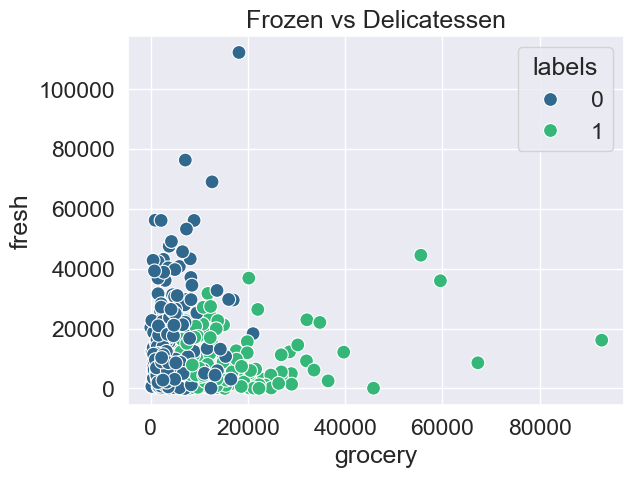

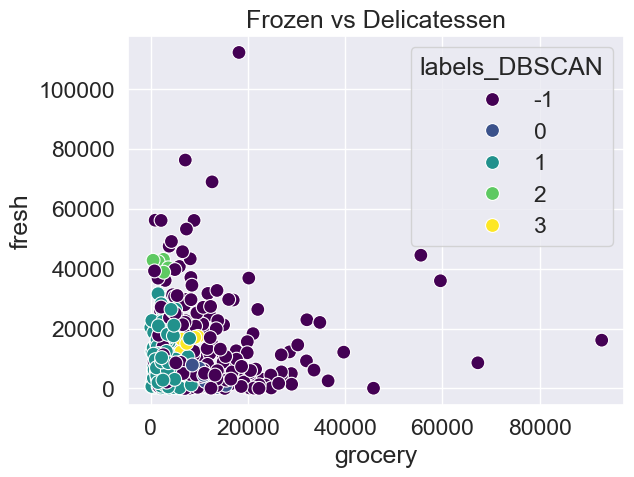

In [65]:
plot(customer_df["grocery"], customer_df["fresh"], customer_df['labels'])
plot(customer_df["grocery"], customer_df["fresh"], customer_df['labels_DBSCAN'])

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [71]:
# Your code here:
group_customerk = customer_df.drop(columns ="labels_DBSCAN")
group_customerk = group_customerk.groupby(['labels']).mean()
group_customerk

,fresh,milk,grocery,frozen,detergents_paper,delicassen
labels,,,,,,
0,13556.055556,3313.748366,3948.130719,3656.408497,803.454248,1263.316993
1,8447.597015,11465.298507,17092.791045,1737.231343,7626.865672,2122.149254


In [73]:
group_customer_dbs = customer_df.drop(columns ="labels")
group_customer_dbs = group_customer_dbs.groupby(['labels_DBSCAN']).mean()
group_customer_dbs

,fresh,milk,grocery,frozen,detergents_paper,delicassen
labels_DBSCAN,,,,,,
-1,14922.668421,9703.010526,13381.284211,4455.494737,5146.315789,2431.115789
0,4749.806452,6797.741935,10439.838710,796.451613,4858.935484,1029.064516
1,9575.407767,2115.825243,2745.708738,2263.800971,566.407767,765.004854
2,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000
3,14726.625000,6636.125000,7003.625000,961.375000,2583.625000,1951.875000


Which algorithm appears to perform better?

**Your observations here**

- **K-means** algorithm is less complex and more accurate to cluster the data in clusters
- The mean for each label in `labels_DBSCAN` it doesn't clearly stablish a clear group with similar characteristics

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [74]:
# Your code here:
inertias = []
range_of_clusters = range(1, 11)

for k in range_of_clusters:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(customers_scale)
    inertias.append(model.inertia_)

In [75]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range_of_clusters), y=inertias, mode='lines+markers', name='Inertia'))
fig.update_layout(title='Elbow Method For Optimal k',
                  xaxis_title='Number of clusters, k',
                  yaxis_title='Inertia',
                  xaxis=dict(tickmode='array', tickvals=list(range_of_clusters)))
fig.show()

In [76]:
# Let's try with k=3, k=4
num_clusters = 3
kmeans_3 = KMeans(n_clusters=num_clusters, random_state=42)

# Fit scaled data
kmeans_3.fit(customers_scale)
customer_df['labels_3'] = kmeans_3.labels_

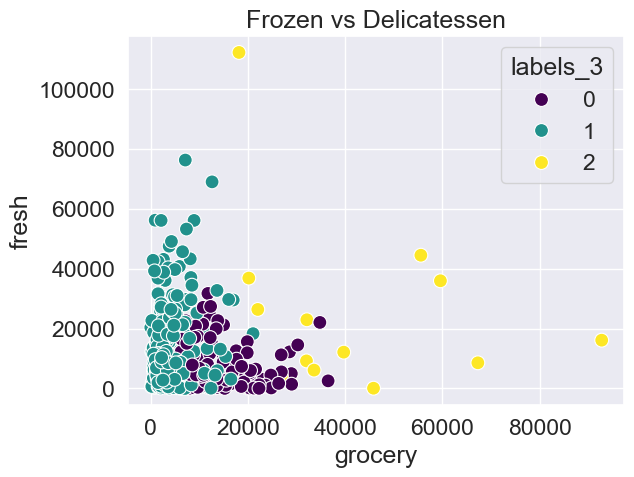

In [77]:
plot(customer_df["grocery"], customer_df["fresh"], customer_df['labels_3'])

In [78]:
# Let's try with k=3, k=4
num_clusters = 4
kmeans_4 = KMeans(n_clusters=num_clusters, random_state=42)

# Fit scaled data
kmeans_4.fit(customers_scale)
customer_df['labels_4'] = kmeans_4.labels_

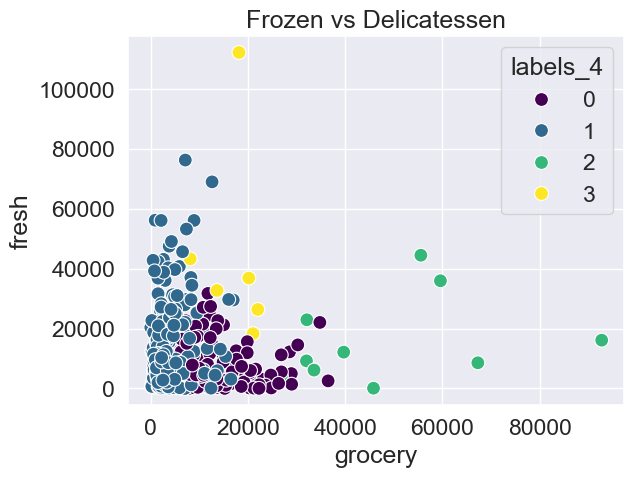

In [79]:
plot(customer_df["grocery"], customer_df["fresh"], customer_df['labels_4'])

**Your comment here**

- K=2 and K=3 can be both good approaches

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [81]:
# Your code here
# Your code here
# Apply DBSCAN clustering
dbscan_1 = DBSCAN(eps=1, min_samples=3)
dbscan_1.fit(customers_scale)
customer_df['labels_DBSCAN_1'] = dbscan_1.labels_

In [84]:
# Your code here:
def plot_title(x,y,hue, title):
    sns.scatterplot(x=x, y=y, hue=hue, palette='viridis', s=100)
    plt.title(title)
    return plt.show()

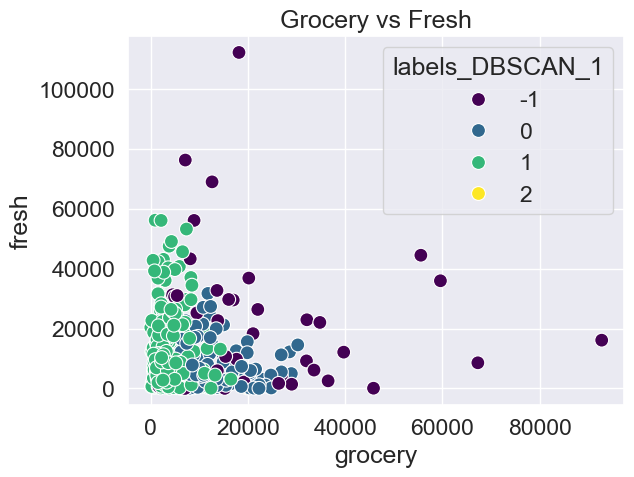

In [86]:
plot_title(customer_df["grocery"], customer_df["fresh"], customer_df['labels_DBSCAN_1'], "Grocery vs Fresh")

In [95]:
dbscan_2 = DBSCAN(eps=2, min_samples=20)
dbscan_2.fit(customers_scale)
customer_df['labels_DBSCAN_2'] = dbscan_2.labels_

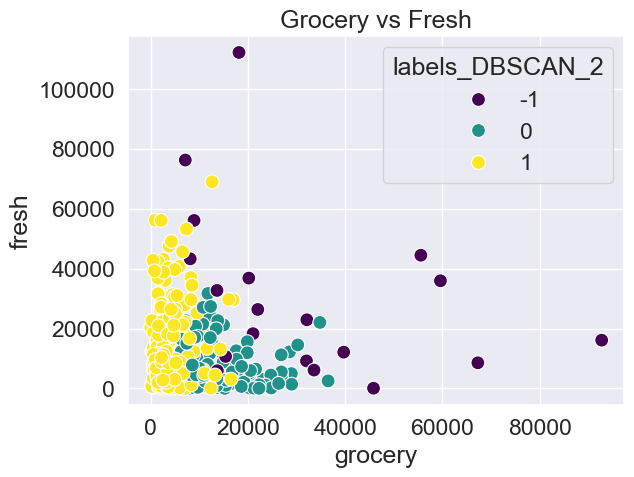

In [96]:
plot_title(customer_df["grocery"], customer_df["fresh"], customer_df['labels_DBSCAN_2'], "Grocery vs Fresh")

**Your comment here**

- `eps` is the maximum distance between two points to be considered as neighbors. In simpler terms, it defines the radius of a neighborhood around each point.
- The bigger the `eps`, the less clusters we will have
- `min_samples` is the minimum number of points required to form a dense region or a cluster. 
- A higher `min_samples` value means that more points are required to form a cluster (resulting in fewer, denser clusters).